**Name:** Omitted 

**Student ID:** Omitted

## Assignment 02, Question: 04

### Predictive and Text analysis

**In this exercise, you will have to analyze a dataset (new york airbnb.csv) that includes information about hosts, geographical availability, and different metrics available from Airbnb places in New York City. The list of available variables is as follows:**

- **id:** listing ID
- **name:** listing Title
- **host id:** ID of Host
- **host name:** name of Host
- **neighbourhood group:** name of location that contains listing
- **neighbourhood:** name of neighbourhood that listing is in
- **latitude:** latitude of listing
- **longitude:** longitude of listing
- **room type:** type of public space that is being offered
- **price:** price per night, USD
- **minimum nights:** minimum number of nights required to book listing
- **number of reviews:** total number of reviews that listing has accumulated
- **last review:** date in which listing was last rented
- **reviews per month:** total number of reviews divided by the number of months the listing is active
- **calculated host listings count:** amount of listing per host
- **availability 365:** number of days per year the listing is active

In [1]:
### Importing necessary libraries

## As usual libraries-

import numpy as np
import pandas as pd


## Data visualization libraries-

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Regression modelling libraries-

from sklearn import linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn import preprocessing   ## For Preprocessing

In [2]:
## Reading the given 'new_york_airbnb.csv' csv file

df_bnb = pd.read_csv('new_york_airbnb.csv.csv', sep = ',', header = 0)
df_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
### Understanding the data, Data Prepearation and EDA

## Following we can have a look from multi dimentional angle to the dataset, 
# such as- numbers of data entries, null values (if any), datatypes.

df_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df_bnb.dropna(subset= ['name'], inplace = True)  ## Droping null values from the 'name' column
df_bnb.shape

(48879, 16)

In [5]:
## Removing duplicate rows (if any) from the dataset

df_bnb = df_bnb.drop_duplicates(keep = 'first')
df_bnb.shape

(48879, 16)

In [6]:
df_bnb.nunique() ## Checking unique values

id                                48879
name                              47905
host_id                           37443
host_name                         11450
neighbourhood_group                   5
neighbourhood                       221
latitude                          19045
longitude                         14717
room_type                             3
price                               674
minimum_nights                      108
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

+ **Build a prediction model for predicting price with random forest regression (do not use ID columns, dates, and the name variable; additionally you may not want to use categorical variables with too many possible categories).** 
+ **Try to optimize the parameters of the model. What is the best result you can get?**


In [7]:
## Some descriptive statistics-

df_bnb.describe()

## We can see here, for example, minimum price is 0 and maximum price is 10000 and these indicate that we have outliers in our 
# dataset. And this is not only about the price column but also for other columns as we can see the differences between the 
# minimum and maximum values. Therefore We will remove some kind of percentage as outliers from the whole dataset.

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887900e+04,4.887900e+04,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,38837.000000,48879.000000,48879.000000
mean,1.902062e+07,6.763013e+07,40.728945,-73.952168,152.722355,7.011027,23.281205,1.373410,7.145891,112.788989
std,1.098282e+07,7.862070e+07,0.054529,0.046160,240.186804,20.016000,44.556149,1.680502,32.957738,131.613322
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.474248e+06,7.816856e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.968643e+07,3.079133e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915334e+07,1.074344e+08,40.763110,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
### Removing outliers: top 1% of values (0.99 quantile)

## Funcion for removing outliers from upper end-

def goons(x):   
    
    for col in x.columns:
        
 ## This checks whether the string 'float' is the sub-string of x[col].dtype as a string, same with 'int'.

        if (('float' in str(x[col].dtype)) | ('int' in str(x[col].dtype))): 
            
            outliers = x[col].quantile(0.99)
            x = x[x[col] < outliers]
            
        else:
            x[col] = x[col]
            
    return x

df_bnb = goons(df_bnb)
df_bnb.shape  

## This stage is now our original dataset after some data cleaning operations. We will use it for our text analysis and 
# next steps
   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(35313, 16)

In [9]:
### Dropping variables we will not use-

df = df_bnb.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review', 'reviews_per_month'], axis = 1)
df.head(3)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,1,129


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CC36B27B08>,
      dtype=object)

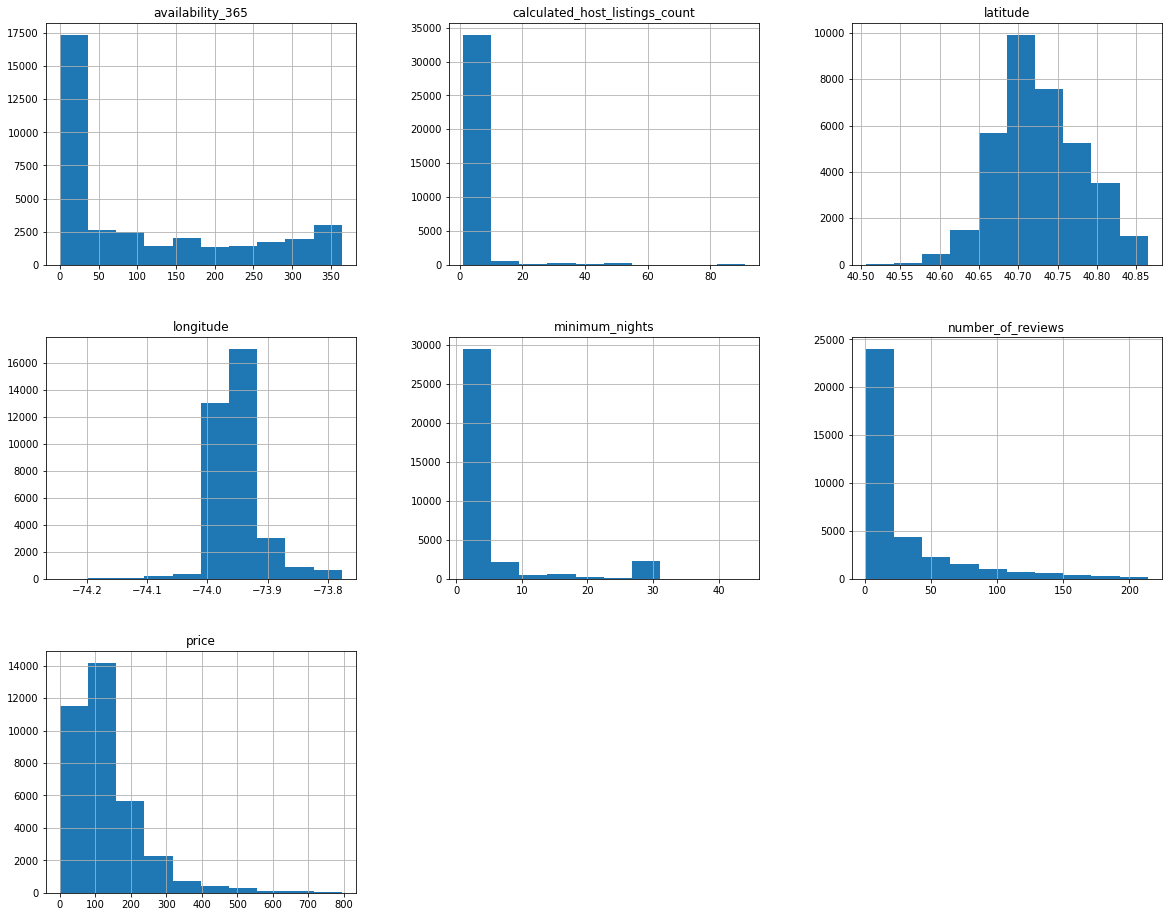

In [10]:
df.hist(figsize=(20, 16))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


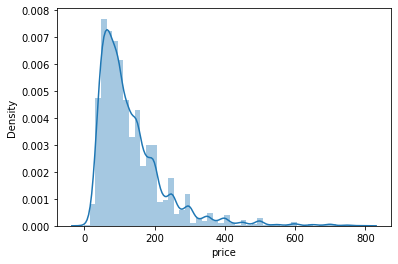

In [11]:
sns.distplot(df['price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


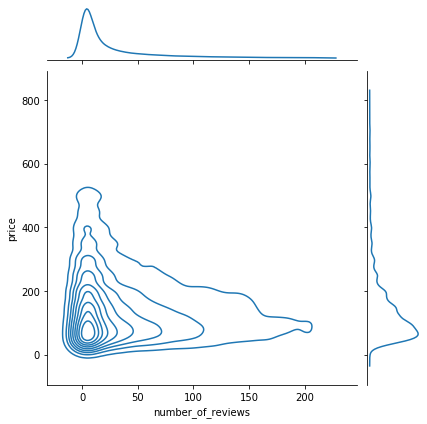

In [12]:
sns.jointplot('number_of_reviews', 'price', data = df, kind = 'kde')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


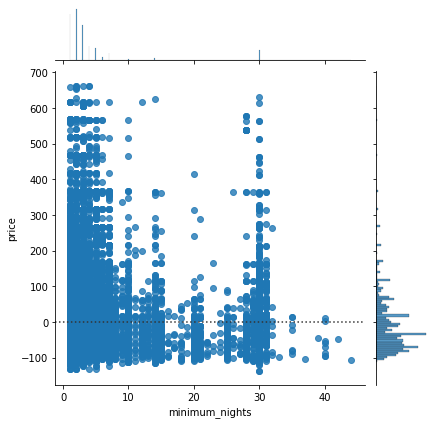

In [13]:
sns.jointplot('minimum_nights', 'price', data = df, kind = 'resid')

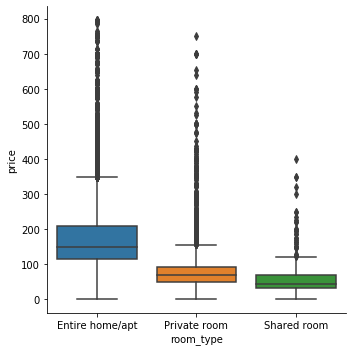

In [14]:
sns.catplot(x = 'room_type', y = 'price', data = df, kind = 'box')

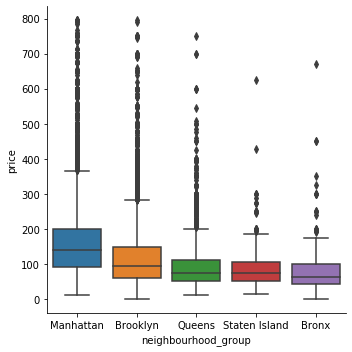

In [15]:
sns.catplot(x = 'neighbourhood_group', y = 'price', data = df, kind = 'box')

In [16]:
### Calculating correlation matrix-

df_corr = df.corr()
df_corr

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
latitude,1.000000,0.107240,0.066193,0.035124,-0.013433,0.045847,-0.035002
longitude,0.107240,1.000000,-0.265984,-0.073418,0.033549,-0.021958,0.096048
price,0.066193,-0.265984,1.000000,0.012229,-0.018114,0.029439,0.082389
minimum_nights,0.035124,-0.073418,0.012229,1.000000,-0.127075,0.387999,0.179235
number_of_reviews,-0.013433,0.033549,-0.018114,-0.127075,1.000000,-0.055221,0.243407
calculated_host_listings_count,0.045847,-0.021958,0.029439,0.387999,-0.055221,1.000000,0.245034
availability_365,-0.035002,0.096048,0.082389,0.179235,0.243407,0.245034,1.000000


In [17]:
df_corr.price.sort_values(ascending = False)  ## Sorting the values of 'price' variable

price                             1.000000
availability_365                  0.082389
latitude                          0.066193
calculated_host_listings_count    0.029439
minimum_nights                    0.012229
number_of_reviews                -0.018114
longitude                        -0.265984
Name: price, dtype: float64

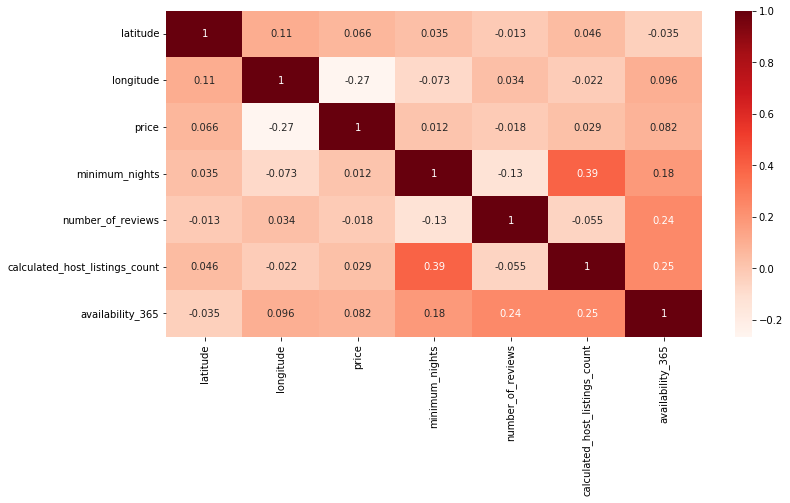

In [18]:
## Plotting correlation: As our target varaible is 'price', we will consider its correlation with other variables.

plt.figure(figsize = (12, 6))

sns.heatmap(df_corr[(df_corr <= -0.01) | (df_corr >= 0.01)], annot = True, cmap = 'Reds')

## We assume that, Correlation Coefficient values greater than (- 0.01) or less than (+ 0.01) are not that significant.

## In this heatmap filtering we can see that, correlations are visible for all the variables in relation to our 
 # target variable.Therefore, we will consider all for our RandomForestRegression model.

In [19]:
### Building a prediction model for predicting price with RandomForestRegression-

## For this we will need to import following libraries-

from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

In [20]:
### As we have some catergorical columns in our dataset we need to treat them first-

cat = ['neighbourhood_group', 'room_type']

df = pd.get_dummies(df, columns = cat, drop_first = True)
df.sample(3)

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
47253,40.75938,-73.80124,40,1,1,1,66,0,0,1,0,1,0
21123,40.81335,-73.95616,50,1,36,1,23,0,1,0,0,0,1
664,40.78558,-73.97260,140,1,176,1,300,0,1,0,0,1,0


In [21]:
### Creating trianing and test sets-

## Separate predictors and target variable 

x = df.drop(['price'], axis = 1) 
y = df['price']

## Data Split: Deviding the data into training set (75 %) and test set (25 %) using 'random_state = 0' method

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [22]:
## Checking the shape of splitted items

print(x.shape, y.shape)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(35313, 12) (35313,)
(26484, 12) (8829, 12)
(26484,) (8829,)


In [23]:
### Defining the RandomForestRegressor model-

df_rf_1 = RandomForestRegressor(n_estimators = 500, random_state = 0)

## Fitting the data or training data-
df_rf_fit_1 = df_rf_1.fit(x_train, y_train)

In [24]:
### Creating prediction-

y_pred_rf_1 = df_rf_1.predict(x_test)

mse_rf_1 = MSE(y_test, y_pred_rf_1)    ## Evaluation

print('MSE of Unpruned RandomForestRegressor is:', mse_rf_1)

MSE of Unpruned RandomForestRegressor is: 4825.493999878129


In [25]:
### Optimizing the RandomForest Regression-

grid = dict(max_depth = [8, 12, 14], min_samples_leaf = [2, 4, 8])

forest_df = RandomForestRegressor(n_estimators= 200, random_state = 0)

grid_search = GridSearchCV(estimator= forest_df, param_grid = grid, scoring = 'neg_mean_squared_error')

grid_result = grid_search.fit(x, y)

print('Best result is obtained using', grid_result.best_params_)

Best result is obtained using {'max_depth': 14, 'min_samples_leaf': 8}


In [26]:
df_rf = RandomForestRegressor(n_estimators= 200, max_depth= 14, min_samples_leaf= 8, random_state= 0)

df_rf_fit = df_rf.fit(x_train, y_train) ## Fitting the training set

y_pred_rf = df_rf_fit.predict(x_test)

mse_rf = MSE(y_test, y_pred_rf)  ## MSE calculation

print('The best MSE of RandomForestRegressor is:', mse_rf)

## We can see now that we improved a bit in minimizing our MSE.

The best MSE of RandomForestRegressor is: 4706.514880587979


In [27]:
### Feature Importance testing-

pd.Series(data = df_rf_fit.feature_importances_, index= x_train.columns)

## We can see here more or less each variable has a role in this prediction model.

latitude                             0.128954
longitude                            0.175293
minimum_nights                       0.053903
number_of_reviews                    0.050703
calculated_host_listings_count       0.038775
availability_365                     0.091354
neighbourhood_group_Brooklyn         0.000360
neighbourhood_group_Manhattan        0.006336
neighbourhood_group_Queens           0.000350
neighbourhood_group_Staten Island    0.000008
room_type_Private room               0.406684
room_type_Shared room                0.047281
dtype: float64

+ **In the next step, you want to understand the impact of the review name on the price. First, identify the 15 most frequent words that appear in the listing column (after basic preprocessing, including changing to lowercase and stemming).** 


+ **Additionally to the general stopwords, think about what other expressions you need to exclude to get some meaningful results (e.g. you do not want things like ’york’, ’apartment’, ’room’, as they just refer to the specific location and context).** 


+ **Then add 15 new columns to the original dataset, with each new variable corresponding to one of the 15 identified frequent words, and the values of the new columns indicate whether that word appears in the name or not. For example, if you identify ’cheap’ as one of the most frequent words, you will need to create a new column, which will have value 1 in a row where ’cheap’ appears in the name, and 0 otherwise.**


+ **Finally, test whether the regression model that you created in the previous step can be improved by including these 15 new columns as predictors?**

In [28]:
### Importing Necessary Libraries-

import nltk ## Library for Natural Language Processing

from nltk.tokenize import sent_tokenize, word_tokenize  ## We need these to cut our texts into meaningful units.

nltk.download('punkt') ## A resource for performing text processing

## We also need to exclude 'stopwords' and for this we need the followings-

nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
### Our original dataFrame was-
df_bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [30]:
### Performing basic text preprocessing-

## We will, first, change the strings of our 'name' column to lower case-
df_bnb['name'] = df_bnb['name'].str.lower()
df_bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
4,5022,entire apt: spacious studio/loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,large cozy 1 br apartment in midtown east,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [31]:
### Splitting the texts in text column and adding the result to a new column- 'split'-

df_bnb['split'] = df_bnb['name'].apply(lambda x: x.split())  
df_bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,split
1,2595,skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,"[skylit, midtown, castle]"
4,5022,entire apt: spacious studio/loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,"[entire, apt:, spacious, studio/loft, by, cent..."
5,5099,large cozy 1 br apartment in midtown east,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,"[large, cozy, 1, br, apartment, in, midtown, e..."


In [32]:
### Importing the PorterStemmer-

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()  ## Creating an object

In [33]:
df_bnb['stemmed'] = df_bnb['split'].apply(lambda x: [stemmer.stem(y) for y in x])
df_bnb = df_bnb.drop(columns=['split'])  ## Dropping the split column
df_bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,stemmed
1,2595,skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,"[skylit, midtown, castl]"
4,5022,entire apt: spacious studio/loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,"[entir, apt:, spaciou, studio/loft, by, centra..."
5,5099,large cozy 1 br apartment in midtown east,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,"[larg, cozi, 1, br, apart, in, midtown, east]"


In [34]:
### Getting back to the single string format under a new column- 'split_final'-

df_bnb['split_final'] = df_bnb['stemmed'].apply(lambda x: ' '.join(x))
df_bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,stemmed,split_final
1,2595,skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,"[skylit, midtown, castl]",skylit midtown castl
4,5022,entire apt: spacious studio/loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,"[entir, apt:, spaciou, studio/loft, by, centra...",entir apt: spaciou studio/loft by central park
5,5099,large cozy 1 br apartment in midtown east,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,"[larg, cozi, 1, br, apart, in, midtown, east]",larg cozi 1 br apart in midtown east


In [35]:
### Importing the library

from sklearn.feature_extraction.text import CountVectorizer  

vect = CountVectorizer()   ## Creating the object

bnb_count = vect.fit_transform(df_bnb['split_final'])  ## Fitting the data or Creating the representation

In [36]:
### We will see what the data looks like and for this we need to convert it to a dataframe-

bnb_count_df = pd.DataFrame(bnb_count.toarray(), columns= vect.get_feature_names())
bnb_count_df.head(3)

,00,000,000sf,000sqft,001,001ll,002,003,004,005,...,안전하고,작은,조용한,주변,한성,ｱｸｾｽ抜群,ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2,ﾆｭｰﾖｰｸの中心,ﾏﾝﾊｯﾀﾝ10分,ﾐｯﾄﾞﾀｳﾝｳｴｽﾄｻｲﾄﾞ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
### Removing Stopwords-

## First we will remove basic stopwords-

stop_words_1 = list(stopwords.words('english'))  ## Creating our 1st stopwords object

vect_1 = CountVectorizer(stop_words = stop_words_1) ## Initializing the object for our countVector

## Creating the representation or applying it

bnb_count_1 = vect_1.fit_transform(df_bnb['split_final'])

In [38]:
### We will see what the data looks like and for this we need to convert it to a dataframe-

bnb_count_df_1 = pd.DataFrame(bnb_count_1.toarray(), columns= vect_1.get_feature_names())
bnb_count_df_1.head(3)

,00,000,000sf,000sqft,001,001ll,002,003,004,005,...,안전하고,작은,조용한,주변,한성,ｱｸｾｽ抜群,ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2,ﾆｭｰﾖｰｸの中心,ﾏﾝﾊｯﾀﾝ10分,ﾐｯﾄﾞﾀｳﾝｳｴｽﾄｻｲﾄﾞ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
### Frequency analyisis-

## For this, we need to sum up the columns to get frequency and sort it

bnb_count_1 = bnb_count_df_1.sum(axis= 0).sort_values(ascending = False)
bnb_count_1[:15]

room            7635
bedroom         6181
privat          5462
apart           4599
cozi            3626
apt             3578
brooklyn        3299
studio          2962
manhattan       2641
spaciou         2612
park            2492
east            2279
williamsburg    2120
sunni           2002
beauti          1806
dtype: int64

In [40]:
### Now, we will extend our Stopwords-

stop_words_2 = stop_words_1 + ['room', 'brooklyn', 'manhattan','park', 'east', 'williamsburg'] 
                                                                            ## Creating our 1st stopwords object

vect_2 = CountVectorizer(stop_words = stop_words_2) ## Initializing the object for our countVector

## Creating the representation or applying it

bnb_count_2 = vect_2.fit_transform(df_bnb['split_final'])

In [41]:
### We will see what the data looks like and for this we need to convert it to a dataframe-

bnb_count_df_2 = pd.DataFrame(bnb_count_2.toarray(), columns= vect_2.get_feature_names())
bnb_count_df_2.head(3)

,00,000,000sf,000sqft,001,001ll,002,003,004,005,...,안전하고,작은,조용한,주변,한성,ｱｸｾｽ抜群,ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2,ﾆｭｰﾖｰｸの中心,ﾏﾝﾊｯﾀﾝ10分,ﾐｯﾄﾞﾀｳﾝｳｴｽﾄｻｲﾄﾞ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
### Frequency analyisis-

## For this, we need to sum up the columns to get frequency and sort it

bnb_count_2 = bnb_count_df_2.sum(axis= 0).sort_values(ascending = False)
bnb_count_2[:15]

bedroom    6181
privat     5462
apart      4599
cozi       3626
apt        3578
studio     2962
spaciou    2612
sunni      2002
beauti     1806
nyc        1669
loft       1636
near       1632
heart      1590
villag     1555
bed        1554
dtype: int64

In [66]:
col= list(bnb_count_2[:15].index)  ## Selecting the columns built with those 15 most frequent words

df_add = bnb_count_df_2[col]  ## Taking those selected 15 columns from the dataset

df.shape, df_add.shape

((35313, 13), (35313, 15))

In [67]:
df_merged = pd.merge(df, df_add, left_index= True, right_index=True) 
                             ### Merging two datasets by index as we do not have any Common columns

df_merged.head(3)

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,studio,spaciou,sunni,beauti,nyc,loft,near,heart,villag,bed
1,40.75362,-73.98377,225,1,45,2,355,0,1,0,...,1,1,0,0,0,1,0,0,0,0
4,40.79851,-73.94399,80,10,9,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,40.74767,-73.97500,200,3,74,1,129,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [68]:
### Following we can have a look from multi dimentional angle to the dataset, 
 # such as- numbers of data entries, null values (if any), datatypes.

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27377 entries, 1 to 35312
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           27377 non-null  float64
 1   longitude                          27377 non-null  float64
 2   price                              27377 non-null  int64  
 3   minimum_nights                     27377 non-null  int64  
 4   number_of_reviews                  27377 non-null  int64  
 5   calculated_host_listings_count     27377 non-null  int64  
 6   availability_365                   27377 non-null  int64  
 7   neighbourhood_group_Brooklyn       27377 non-null  uint8  
 8   neighbourhood_group_Manhattan      27377 non-null  uint8  
 9   neighbourhood_group_Queens         27377 non-null  uint8  
 10  neighbourhood_group_Staten Island  27377 non-null  uint8  
 11  room_type_Private room             27377 non-null  uin

In [69]:
### Creating trianing and test sets-

## Separate predictors and target variable 

x = df_merged.drop(['price'], axis = 1) 
y = df_merged['price']

## Data Split: Deviding the data into training set (75 %) and test set (25 %) using 'random_state = 0' method

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [70]:
### Defining the RandomForestRegressor model-

df_rf_1 = RandomForestRegressor(n_estimators = 500, random_state = 0)

## Fitting the data or training data-
df_rf_fit_1 = df_rf_1.fit(x_train, y_train)

In [71]:
### Creating prediction-

y_pred_rf_1 = df_rf_1.predict(x_test)

mse_rf_1 = MSE(y_test, y_pred_rf_1)    ## Evaluation

print('MSE of Unpruned RandomForestRegressor is:', mse_rf_1)

## We can see we have already improved in minimizing our MSE which is better than the best one previously we got

MSE of Unpruned RandomForestRegressor is: 4504.372266619723


In [72]:
### Optimizing the RandomForest Regression-

grid = dict(max_depth = [8, 12, 14], min_samples_leaf = [2, 4, 8])

forest_df = RandomForestRegressor(n_estimators= 200, random_state = 0)

grid_search = GridSearchCV(estimator= forest_df, param_grid = grid, scoring = 'neg_mean_squared_error')

grid_result = grid_search.fit(x, y)

print('Best result is obtained using', grid_result.best_params_)

Best result is obtained using {'max_depth': 14, 'min_samples_leaf': 8}


In [73]:
df_rf = RandomForestRegressor(n_estimators= 200, max_depth= 14, min_samples_leaf= 8, random_state= 0)

df_rf_fit = df_rf.fit(x_train, y_train) ## Fitting the training set

y_pred_rf = df_rf_fit.predict(x_test)

mse_rf = MSE(y_test, y_pred_rf)  ## MSE calculation

print('The best MSE of RandomForestRegressor is:', mse_rf)

## We can see now that we improved a lot in minimizing our MSE.

The best MSE of RandomForestRegressor is: 4333.040097330799
